### **Modelos de Entrenamiento**

## <span style="color:green">1. Regresión Lineal</span>

**Modelo de Regresión Lineal**

$ y = h_b(x) = b \cdot x $

**Ecuación del Promedio de la suma de los errores al cuadro**

$ MSE(b) = \frac{1}{m} \sum_{i=1}^{m}(b^Tx^i-y^i)^2$

**Ecuación Normal**

$ \hat{b} = (x^Tx)^{-1} x^T y $

#### <span style="color:blue"> 1.1 Ecuación Normal </span>

In [1]:
# Importar las librerías, numpy, matplotlib, pandas
import numpy as np
#Importar matplotlib porque vamos a estar haciendo gráficas
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
#Generar el set de datos lineales aleatorios
x = np.random.rand(100,1)

#Genera vector de valores que vas a estar prediciendo (añade un factor de aleatoriedad)
y = 3 + 3 * x + np.random.rand(100,1)

In [ ]:
#Revisar los vectores
print(x)
print('------------')
print(y)

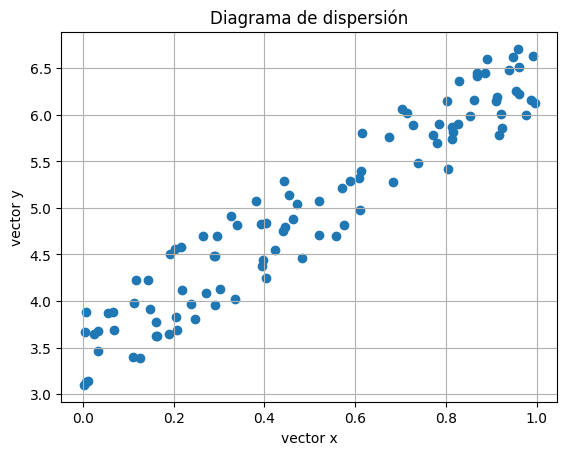

In [10]:
#Gráfica los datos del set de juguete
plt.scatter(x,y)
plt.xlabel('vector x')
plt.ylabel('vector y')
plt.title('Diagrama de dispersión')
plt.grid()
plt.show()

In [12]:
#Agregar el valor de x0
x_b = np.c_[np.ones((100,1)),x]
#Aplicar la ecuación normal
param = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)
#Visualización de los parametros
param

array([[3.44728988],
       [3.04658786]])

**El primer valor de la matriz es la pendiente y el segundo es la intersección **

In [13]:
#Prueba estes datos con un vector de prueba
x_nuevo = np.array([[0],[1]])

In [14]:
print(x_nuevo)

[[0]
 [1]]


In [15]:
#Agregar X0=1
x_nuevo_b = np.c_[np.ones((2,1)),x_nuevo]

In [16]:
print(x_nuevo_b)

[[1. 0.]
 [1. 1.]]


In [18]:
#Hacer las predicciones con la ecuación normal
y_pred = x_nuevo_b.dot(param)
y_pred

array([[3.44728988],
       [6.49387774]])

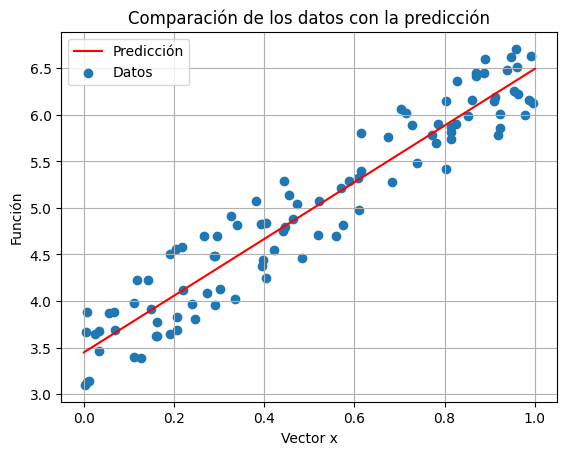

In [19]:
#Grafica la regresión con los datos originales y la predicción
plt.plot(x_nuevo,y_pred,"r-",label="Predicción")
plt.scatter(x,y,label="Datos")
plt.xlabel('Vector x')
plt.ylabel('Función')
plt.title('Comparación de los datos con la predicción')
plt.legend()
plt.grid()
plt.show()

#### <span style="color:blue"> 1.2 Regresor Linear de Scikit </span>

In [20]:
#Haz la regresión con scikit
from sklearn.linear_model import LinearRegression
reg_lin = LinearRegression()
reg_lin.fit(x,y)
#Cálcula la intersección y la pendiente con este método
reg_lin.intercept_,reg_lin.coef_

(array([3.44728988]), array([[3.04658786]]))

Los parámetros son iguales a los que obtuvimos en el método anterior. En este caso, tendrías que evaluar el costo que implica cada método a nivel del computador.

***

## <span style="color:green">2. Descenso del Gradiente</span>

#### <span style="color:blue"> 2.1 Descenso del Gradiente por Lote</span>

**Derivada parcial de la función de costo (MSE)**

$ \frac{\partial}{\partial b} J(b) = \frac{2}{m} \sum_{i=1}^{m}(b^Tx^i-y^i)x^i$

**Vector del Gradiente de la función de costo**

$ \bigtriangledown_b MSE(b) = [\frac{\partial}{\partial b_1} MSE(b_1), \frac{\partial}{\partial b_2} MSE(b_2) ,....\frac{\partial}{\partial b_m} MSE(b_m)] = \frac{2}{m} X^T(Xb-y) $

**Step del descenso del Gradiente**

$ b^{+} = b-n\bigtriangledown_b MSE(b) $

In [21]:
# Definir la tasa de aprendizaje (ra)
ra = 0.1
#Definir las iteraciones. 1000 es un estándar. En 1000 se va a detener
iteraciones = 1000
#Número de datos
m = 100

#Incializa la pendiente
b = np.random.rand(2,1)

In [22]:
print(b)

[[0.91221596]
 [0.37209154]]


In [23]:
#Hacer el programa para el descenso del gradiente
for iteracion in range(iteraciones):
    #Expresión a manera de ágebra lineal de los mínimos cuadrados (función de costo)
    gradientes  = 2/m * x_b.T.dot(x_b.dot(b) - y)
    b = b -ra * gradientes
b

array([[3.44728995],
       [3.04658773]])

Los resultados nos da extremadamente cercano a los datos obtenidos con la ecuación normal. Ojo: recuerda que el descenso del gradiente es un método de aproximación

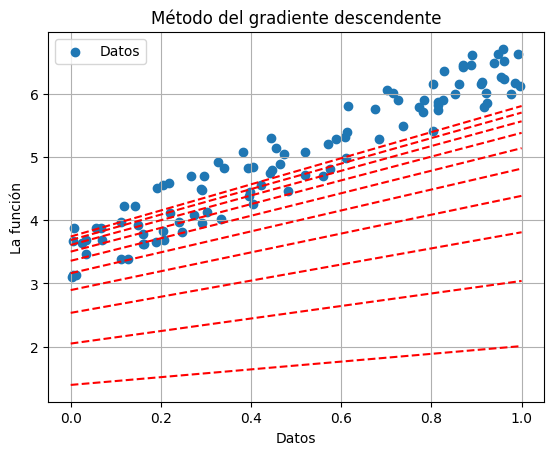

array([[-0.55683536],
       [-0.48489337]])

In [28]:
#Repetir el ejercicio pero con ritmo de tasa de aprendizaje diferente
ra = 0.1
iteraciones = 10
m = 100
b = np.random.rand(2,1)
plt.scatter(x,y,label="Datos")
#Visualiza los modelos que va proponiendo hasta llegar a la predicción final
for iteracion in range(iteraciones):
    gradientes  = 2/m * x_b.T.dot(x_b.dot(b) - y)
    b = b -ra * gradientes
    y_nuevo = x_nuevo_b.dot(b)
    plt.plot(x_nuevo,y_nuevo,"r--")
plt.title('Método del gradiente descendente')
plt.xlabel('Datos')
plt.ylabel('La función')
plt.legend()
plt.grid()
plt.show()

gradientes

**Ejercicio**: Varía la tasa de aprendizaje y los número de pasos para observar como funciona el gradiente de tipo batch

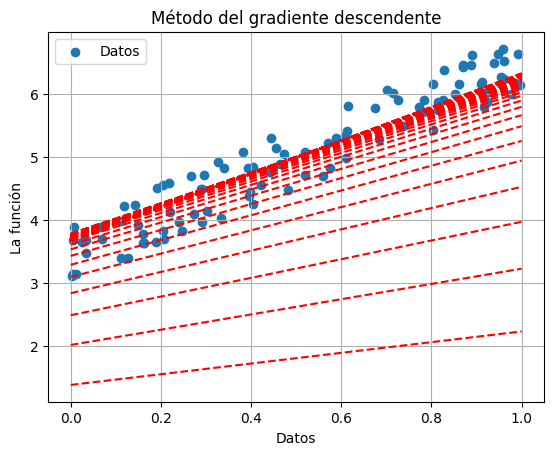

array([[ 0.03303642],
       [-0.06082938]])

In [29]:
#Revisión del ejercicio
#Variamos el numero de iteraciones
ra = 0.1
iteraciones = 50
m = 100
b = np.random.rand(2,1)
plt.scatter(x,y,label="Datos")
#Visualiza los modelos que va proponiendo hasta llegar a la predicción final
for iteracion in range(iteraciones):
    gradientes  = 2/m * x_b.T.dot(x_b.dot(b) - y)
    b = b -ra * gradientes
    y_nuevo = x_nuevo_b.dot(b)
    plt.plot(x_nuevo,y_nuevo,"r--")
plt.title('Método del gradiente descendente')
plt.xlabel('Datos')
plt.ylabel('La función')
plt.legend()
plt.grid()
plt.show()

gradientes

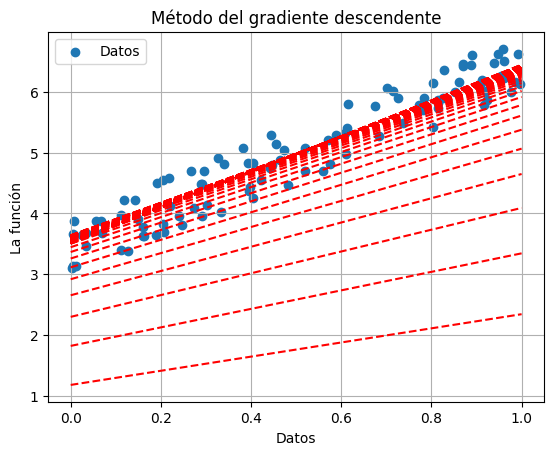

array([[ 0.00905659],
       [-0.01667254]])

In [30]:
#Revisión del ejercicio
#Variamos el numero de iteraciones
ra = 0.1
iteraciones = 100
m = 100
b = np.random.rand(2,1)
plt.scatter(x,y,label="Datos")
#Visualiza los modelos que va proponiendo hasta llegar a la predicción final
for iteracion in range(iteraciones):
    gradientes  = 2/m * x_b.T.dot(x_b.dot(b) - y)
    b = b -ra * gradientes
    y_nuevo = x_nuevo_b.dot(b)
    plt.plot(x_nuevo,y_nuevo,"r--")
plt.title('Método del gradiente descendente')
plt.xlabel('Datos')
plt.ylabel('La función')
plt.legend()
plt.grid()
plt.show()

gradientes

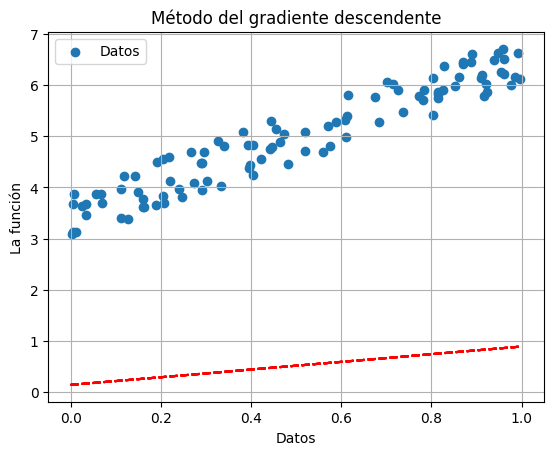

array([[-8.91509323],
       [-4.92114398]])

In [31]:
#Revisión del ejercicio
#Variamos la tasa de aprendizaje
ra = 0.00001
iteraciones = 10
m = 100
b = np.random.rand(2,1)
plt.scatter(x,y,label="Datos")
#Visualiza los modelos que va proponiendo hasta llegar a la predicción final
for iteracion in range(iteraciones):
    gradientes  = 2/m * x_b.T.dot(x_b.dot(b) - y)
    b = b -ra * gradientes
    y_nuevo = x_nuevo_b.dot(b)
    plt.plot(x_nuevo,y_nuevo,"r--")
plt.title('Método del gradiente descendente')
plt.xlabel('Datos')
plt.ylabel('La función')
plt.legend()
plt.grid()
plt.show()

gradientes

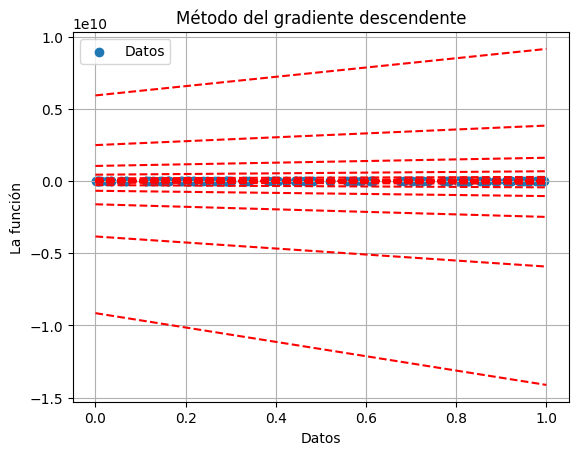

array([[1.50818365e+10],
       [8.19250816e+09]])

In [32]:
#Revisión del ejercicio
#Variamos el numero de iteraciones
ra = 1
iteraciones = 50
m = 100
b = np.random.rand(2,1)
plt.scatter(x,y,label="Datos")
#Visualiza los modelos que va proponiendo hasta llegar a la predicción final
for iteracion in range(iteraciones):
    gradientes  = 2/m * x_b.T.dot(x_b.dot(b) - y)
    b = b -ra * gradientes
    y_nuevo = x_nuevo_b.dot(b)
    plt.plot(x_nuevo,y_nuevo,"r--")
plt.title('Método del gradiente descendente')
plt.xlabel('Datos')
plt.ylabel('La función')
plt.legend()
plt.grid()
plt.show()

gradientes

In [33]:
#Otro analisis del gradiente descedente
#Revisar el colab de Gradiente descendente

***

#### <span style="color:blue"> 2.2 Descenso del Gradiente Estocástico</span>

Debido a qué la complejidad computacional del descenso del gradiente de lote es alto, podemos ver el descenso del gradiente estocástico para poder mejorar las predicción.

**Ventajas**: Puedes trabajar con más datos, escapa de los mínimos locales.

**Desventajas:** No es tan exacto como los otros métodos. Sin embargo, su variación es despreciable

In [34]:
# epochs: cuántas gradientes hará, cuántos datos seleccionará para hacer el gradiente
epochs = 50
#Calendario de aprendizaje, sirve para definir el ritmo de aprendizaje
t0 , t1 = 5, 50
m = 100
#Definir el horario de aprendizaje
def horario_aprendizaje(t):
    return t0 / (t + t1)
#Definir los 2 valores con lo que van a empezar
b = np.random.rand(2,1)

#Definir la función
for epoch in range(epochs):
    for i in range(m):
        #Genera un índice aleatorio
        random_index = np.random.randint(m)
        #Valor x de la coordenada que seleccionamos al azar
        xi = x_b[random_index:random_index+1]
        #Valor y de la coordenada que seleccionamos al azar
        yi = y[random_index:random_index+1]
        #Calcular el gradiente (Resultado de la derivada parcial)
        gradientes  = 2 * xi.T.dot(xi.dot(b) - yi)
        #Calcular el ritmo de aprendizaje
        ra = horario_aprendizaje(epoch * m + i)
        #Calcular los parámetros de intersección y pendiente
        b = b -ra * gradientes
b

array([[3.4591734 ],
       [3.04906741]])

Aunque existe variación con el resultado de los métodos anteriores, la diferencia es mínima

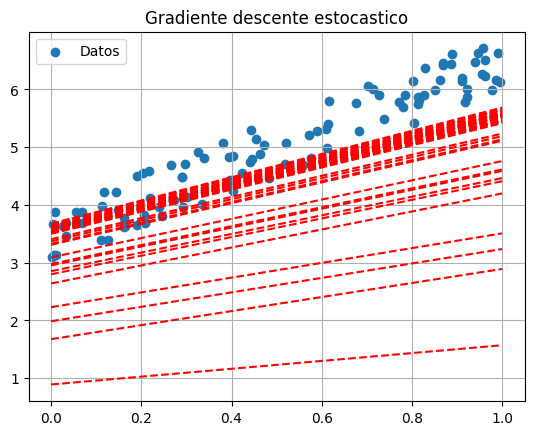

In [37]:
# #Repetir el ejercicio pero desplegando cada gradiente realizado
epochs = 4
t0 , t1 = 5, 50
m = 10

def horario_aprendizaje(t):
    return t0 / (t + t1)

b = np.random.rand(2,1)
#Agrega un scatterplot para ver los datos
plt.scatter(x,y,label="Datos")

for epoch in range(epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = x_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        y_nuevo = x_nuevo_b.dot(b)
        #Grafica las líneas rojas que simbolizan los diferentes gradientes a través de las iteraciones.
        plt.plot(x_nuevo,y_nuevo,"r--")
        gradientes  = 2 * xi.T.dot(xi.dot(b) - yi)
        ra = horario_aprendizaje(epoch * m + i)
        b = b -ra * gradientes
plt.title('Gradiente descente estocastico')
plt.grid()
plt.legend()
plt.show()

In [38]:
#Hacerlo con scikit
from sklearn.linear_model import SGDRegressor
#La toleración es el límite menor al valor de la suma de los errores al cuadrado
sgd = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
#.ravel: te genera una lista normal
sgd.fit(x, y.ravel())
#Sacar los parámetros, la intersección y la pendiente
sgd.intercept_, sgd.coef_

(array([3.50046105]), array([2.93990109]))

In [39]:
#Visualiza la lista normal que genera .ravel
y.ravel()

array([4.81691301, 4.01833541, 3.09796633, 5.27702421, 3.81068068,
       4.43801362, 3.3929194 , 5.39926895, 4.08475654, 3.68928808,
       5.76510171, 6.01322748, 6.0588884 , 3.68155635, 5.78690577,
       6.6046435 , 3.68597   , 3.91512418, 4.69422869, 3.77644931,
       4.69639721, 5.86845562, 6.454222  , 6.12858469, 4.79569104,
       5.89806285, 4.8383218 , 5.90387615, 6.14656297, 3.64094685,
       3.97597675, 6.15748458, 4.50176285, 6.44610426, 4.82467208,
       4.88214084, 3.64995109, 3.87234469, 4.48664579, 4.46251816,
       5.04364369, 4.699932  , 4.7066071 , 5.81894829, 3.62251322,
       4.47935733, 6.62927299, 3.12756393, 6.70803882, 4.75071186,
       5.20877628, 5.4823315 , 6.16187251, 6.14531549, 3.46484594,
       6.22453629, 5.31969945, 4.24864439, 5.99424249, 6.19065564,
       4.22248251, 6.01469274, 4.91205782, 5.07380427, 4.97775317,
       5.74341229, 5.80161695, 4.2276433 , 4.81522802, 4.11872589,
       3.38923623, 4.55541433, 4.13321492, 5.78198597, 5.29310

👀: Con este método si existió una variación importante en los resultados obtenidos. Es cuestión de criterio el sacrificar exactitud por costo computacional o viceversa.

***

## <span style="color:green">3. Regresión polinomial</span>

Regresión polinomial es una regresión linel a la cual le agregamos ecuaciones con potencia más elevada

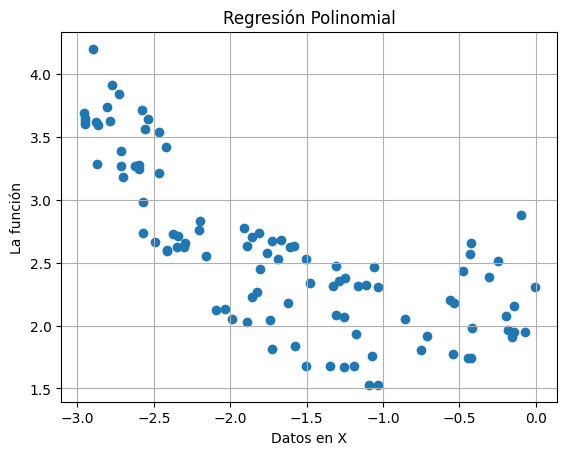

In [40]:
#Generar set de datos de juguete. Añade un toque de aleatoriedad
m = 100
x = 3 * np.random.rand(m,1) - 3
#Elevar la ecuación al 2
y = 2 + x + 0.5*x**2 + np.random.rand(m,1)
#Gráfica el set de datos
plt.scatter(x,y)
plt.title('Regresión Polinomial')
plt.xlabel('Datos en X')
plt.ylabel('La función')
plt.grid()
plt.show()

No hay una función en scikit para hacer regresiones polinomiales como tal. Pero podemos utilizar PolynomialFeature que toma los valores de x y los eleva a una potencia especificada.

In [42]:
#Importar PolynomialFeatures con una potencia 2
from sklearn.preprocessing import PolynomialFeatures
poli = PolynomialFeatures(degree=2, include_bias=False)
x_poli = poli.fit_transform(x)
x[0], x_poli[0]

(array([-0.42665108]), array([-0.42665108,  0.18203114]))

In [43]:
#Hacer una regresión lineal sobre de los datos
reg_lin = LinearRegression()
reg_lin.fit(x_poli,y)
reg_lin.intercept_,reg_lin.coef_

(array([2.33152122]), array([[0.72221211, 0.41044781]]))

Primero aparece el dato de la intersección y luego aparece los coeficientes de de x y x2, respectivamente

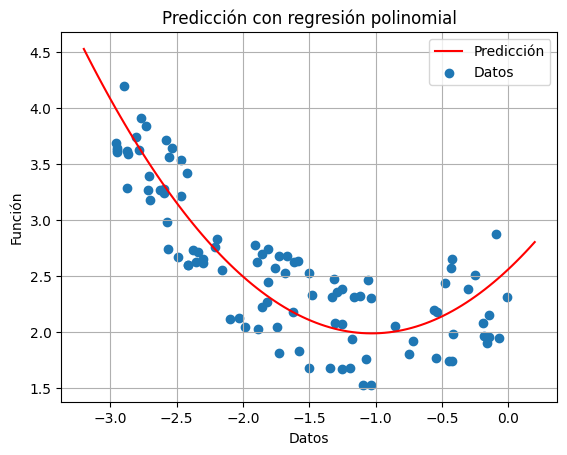

In [45]:
#Graficar la predicción de PolynomialFeatures y los datos originales
x_nuevo = np.linspace(-3.2,0.2,100)
#escribir la fórmula a partir del array de arriba
y_nuevo = 2.56 + 1.11 * x_nuevo + 0.539 * x_nuevo ** 2
plt.plot(x_nuevo,y_nuevo,"r-",label="Predicción")
plt.scatter(x,y,label="Datos")
plt.legend()
plt.title('Predicción con regresión polinomial')
plt.xlabel('Datos')
plt.ylabel('Función')
plt.grid()
plt.show()

**Ejercicio**: calcular la suma de los errores al cuadrado  y compararlo con una predicción lineal

***

## <span style="color:green">4. Curvas de Aprendizaje</span>

In [46]:
#Importar mean_squared_error train_test_split para medir el error sobre los datos de entranamiento y validación
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


def curvas_aprendizaje(modelo ,x , y):
    #Empezamos dividiendo los datos en datos de entrenamiento y validación
    x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2)
    #Generar una lista vacías para irlas rellenando conforme se vaya calculando los errores
    train_error, val_errors= [], []
    #Tomar el set de entrenamiento y ajustándolo al modelo pero solo con un dato de entrenamiento y así sucesivamente
    for m in range(1,len(x_train)):
        modelo.fit(x_train[:m], y_train[:m])
        #predecir el modelo
        y_train_pred = modelo.predict(x_train[:m])
        #predecir el modelo
        y_val_predict = modelo.predict(x_val)
        #Calcular los errores
        train_error.append(mean_squared_error(y_train[:m],y_train_pred))
        val_errors.append(mean_squared_error(y_val,y_val_predict))

        #graficarlos
    plt.plot(np.sqrt(train_error), "r-+", label = "set de entranamiento")
    plt.plot(np.sqrt(val_errors), "b-", label = "set de validación")
    plt.axis([0,80,0,2])
    plt.grid()
    plt.legend()
    plt.show()

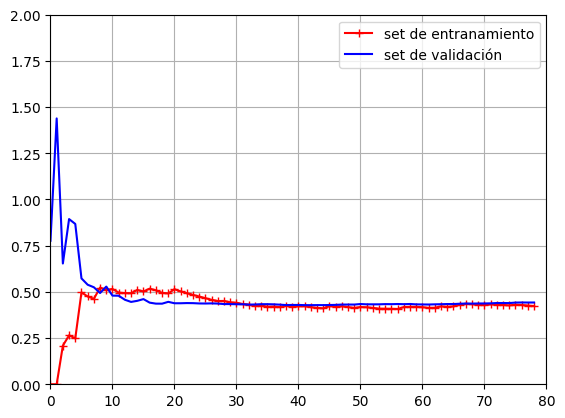

In [47]:
#Correr la curva de aprendizaje
reg_lin = LinearRegression()
curvas_aprendizaje(reg_lin, x, y)

In [51]:
#Hacer un pipeline llamado regresion_polinomial que haga una regresión polinomial y lineal
from sklearn.pipeline import Pipeline

regresion_polinomial = Pipeline([
    ("carac_polinomiales", PolynomialFeatures(degree=5, include_bias=False)),
    ("reg_lin", LinearRegression())
])

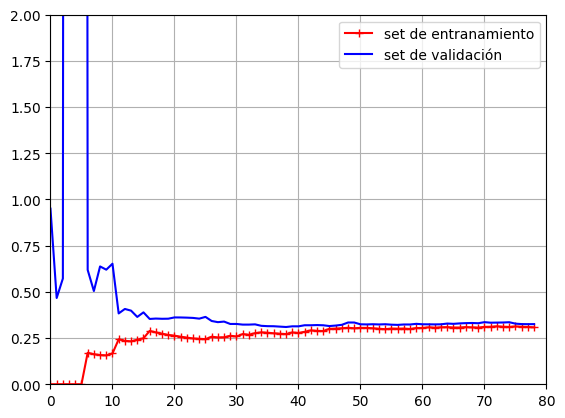

In [52]:
#Ejecutar curvas de aprendizaje a regresion_polinomial
curvas_aprendizaje(regresion_polinomial,x,y)

In [53]:
#Variar el grado del polinomio para mejorar el rendimiento del modelo. Ejemplo:2
from sklearn.pipeline import Pipeline

regresion_polinomial = Pipeline([
    ("carac_polinomiales", PolynomialFeatures(degree=2, include_bias=False)),
    ("reg_lin", LinearRegression())
])

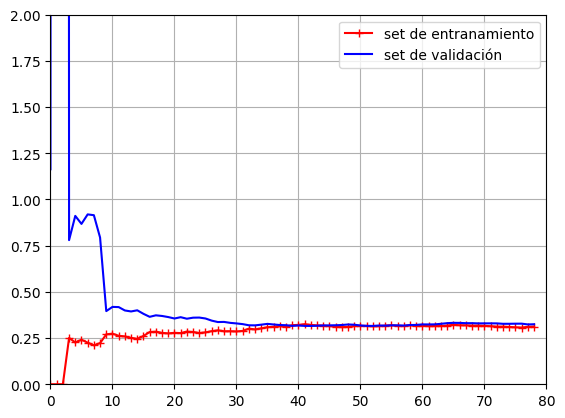

In [54]:
curvas_aprendizaje(regresion_polinomial,x,y)

Generalemnte, cuando las línas se tocan signfica que llegaste a un buen modelo. No esta sobreajustado ni subajustado

***

## <span style="color:green">5. Regularización de Modelos lineales</span>

### <span style="color:blue">5.1 Regresión de Ridge o de Cresta</span>

**Término de regularización en la regresión de Ridge**

$ \alpha \sum_{i=1}^{m} b_i^2 $

**Función de costo de la regresión de Ridge**

$ MSE(b) + \alpha \frac{1}{2} \sum_{i=1}^{m} b^2 $

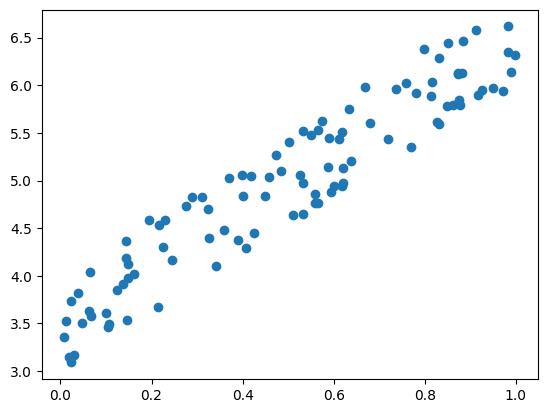

In [27]:
#Hacer un set de datos
x = np.random.rand(100,1)
y = 3 + 3 * x + np.random.rand(100,1)
plt.scatter(x,y,label="Datos")

In [28]:
#Hacer una regresión lineal sencilla para comparar con la regresión de cresta
lin_reg=LinearRegression()
lin_reg.fit(x,y)
lin_reg.intercept_, lin_reg.coef_

(array([3.5253704]), array([[2.90700856]]))

In [29]:
#Generar 100 datos para graficar la linea de predicción
x_nuevo = np.linspace(0,1,100)
y_nuevo = 3.46 + 3.09 * x_nuevo

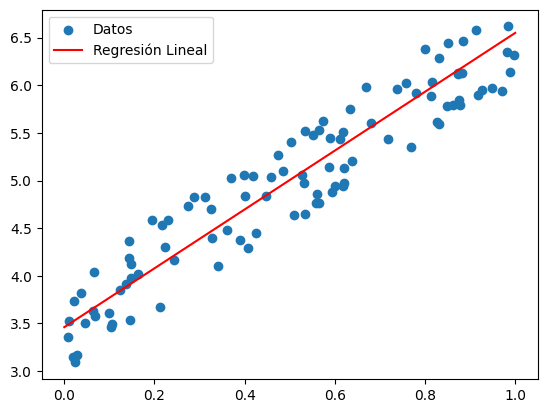

In [30]:
#graficar
plt.scatter(x,y,label="Datos")
plt.plot(x_nuevo,y_nuevo,"r-",label="Regresión Lineal")
plt.legend()
plt.show()

In [31]:
#Importar Ridge para hacer nuestra regresión de cresta
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(x,y)

Ridge()

In [32]:
#Calcula los parámetros de ridge
ridge.intercept_, ridge.coef_

(array([3.67108502]), array([[2.61450987]]))

In [33]:
#Hacer la linea de la predicción de Ridge
x_cresta = np.linspace(0,1,100)
y_cresta = 3.66 + 2.72 * x_cresta

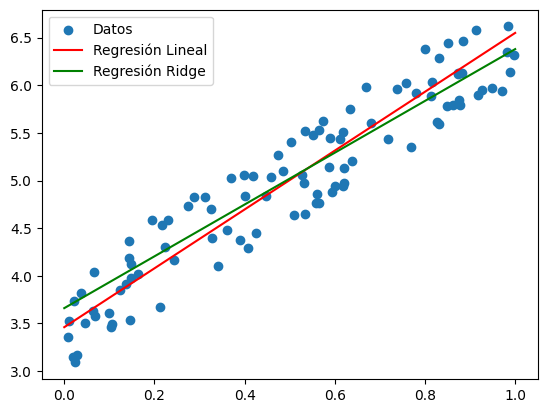

In [34]:
#graficar comparando la regresión lineal y de Ridge
plt.scatter(x,y,label="Datos")
plt.plot(x_nuevo,y_nuevo,"r-",label="Regresión Lineal")
plt.plot(x_cresta,y_cresta,"g-",label="Regresión Ridge")
plt.legend()
plt.show()

***

### <span style="color:blue">5.2 Regresión de Lasso</span>

**Función de costo de la regresión de regresión de Lasso**

$ MSE(b) + \alpha  \sum_{i=1}^{m} |b| $

In [35]:
#Importar lasso
from sklearn.linear_model import Lasso
#Asignar una alpha de 0.1
lasso = Lasso(alpha=0.1)
lasso.fit(x,y)

Lasso(alpha=0.1)

In [36]:
#Calcular los parámetros de intersección y coeficientes de x
lasso.intercept_, lasso.coef_

(array([4.08270092]), array([1.78825706]))

In [37]:
#Hacer la linea de la predicción de lasso
x_lasso = np.linspace(0,1,100)
y_lasso = 3.99 + 1.86 * x_lasso

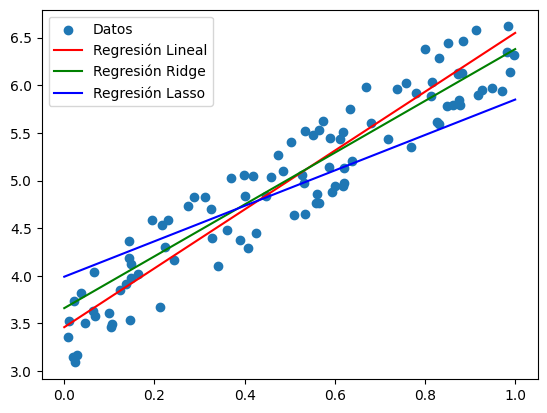

In [38]:
#graficar comparando la regresión lineal, de Ridge y de Lasso
plt.scatter(x,y,label="Datos")
plt.plot(x_nuevo,y_nuevo,"r-",label="Regresión Lineal")
plt.plot(x_cresta,y_cresta,"g-",label="Regresión Ridge")
plt.plot(x_lasso,y_lasso,"b-",label="Regresión Lasso")
plt.legend()
plt.show()

***

### <span style="color:blue">5.3 Regresión de Red Elástica</span>

**Función de costo de la Regresión de Red Elástica**

$ MSE(b) + r\alpha  \sum_{i=1}^{m} |b| + \alpha \frac{1-r}{2} \sum_{i=1}^{m} b^2 $

In [39]:
#Importar ElasticNet
from sklearn.linear_model import ElasticNet
net = ElasticNet(alpha=0.1, l1_ratio=0.5)
net.fit(x,y)

ElasticNet(alpha=0.1)

In [40]:
#Calcular los parámetros de intersección y coeficientes de x
net.intercept_, net.coef_

(array([4.22356489]), array([1.50549526]))

In [41]:
#Hacer la linea de la predicción de Red Elástica
x_net = np.linspace(0,1,100)
y_net = 4.14013 + 1.5356 * x_net

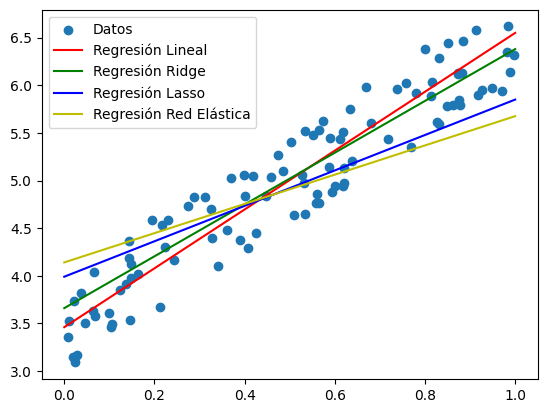

In [42]:
#graficar comparando la regresión lineal, de Ridge, de Lasso y de Red Elástica
plt.scatter(x,y,label="Datos")
plt.plot(x_nuevo,y_nuevo,"r-",label="Regresión Lineal")
plt.plot(x_cresta,y_cresta,"g-",label="Regresión Ridge")
plt.plot(x_lasso,y_lasso,"b-",label="Regresión Lasso")
plt.plot(x_net,y_net,"y-",label="Regresión Red Elástica")
plt.legend()
plt.show()

***

## <span style="color:green">6. Regresión Logistica</span>

**Modelo de Regresión Logística**

$ \hat{p} = L(b^Tx) $

**Función logística**

$ L = \frac {1}{1+e^{-t}} $

**Función de Costo de la Regresión Logística**

$ J(b) = \frac{1}{m} \sum_{i=1}^{m}[ylog(\hat p)+(1-y)log(1-\hat p)] $

**Derivada de la función de Costo**

$ \frac{\partial}{\partial b} J(b) $

In [43]:
#Traer el set de datos
candidates = {'gmat': [780,750,690,710,680,730,690,720,740,690,610,690,710,680,770,610,580,650,540,590,620,600,550,550,570,670,660,580,650,660,640,620,660,660,680,650,670,580,590,690],
              'gpa': [4,3.9,3.3,3.7,3.9,3.7,2.3,3.3,3.3,1.7,2.7,3.7,3.7,3.3,3.3,3,2.7,3.7,2.7,2.3,3.3,2,2.3,2.7,3,3.3,3.7,2.3,3.7,3.3,3,2.7,4,3.3,3.3,2.3,2.7,3.3,1.7,3.7],
              'work_experience': [3,4,3,5,4,6,1,4,5,1,3,5,6,4,3,1,4,6,2,3,2,1,4,1,2,6,4,2,6,5,1,2,4,6,5,1,2,1,4,5],
              'admitted': [1,1,0,1,0,1,0,1,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,0,0,0,1]
              }
#Visualizar el set de datos
df = pd.DataFrame(candidates,columns= ['gmat', 'gpa','work_experience','admitted'])
df.head()

,gmat,gpa,work_experience,admitted
0,780,4.0,3,1
1,750,3.9,4,1
2,690,3.3,3,0
3,710,3.7,5,1
4,680,3.9,4,0


**KEY:**
gmat: prueba de coeficiente intelectual
gpa: es el promedio de cursos

In [44]:
#Dividir el set de datos en en las variables predichas y la variable a predecir
x = df[['work_experience','gpa']]
y = df['admitted']

In [45]:
#importar LogisticRegression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(x,y)

LogisticRegression()

In [46]:
#Hacer las predicciones
y_pred = clf.predict(x)

In [47]:
#Visualiza y_pred
y_pred

array([1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1])

In [48]:
#Utilizar la función predict_proba para visualizar la probabilidad de que sea admitido
y_proba = clf.predict_proba(x)

In [49]:
#Generar una lista para ver la probabilidad de ser admitidos y a los que no
y_probano = [y_proba[i][1] for i in range(0,len(y_proba))]
y_probasi = [y_proba[i][0] for i in range(0,len(y_proba))]

In [50]:
#Incluir estas listas en nuestro dataframe
df["predict"] = y_pred
df["probano"] = y_probano
df["probasi"] = y_probasi
df.head()

,gmat,gpa,work_experience,admitted,predict,probano,probasi
0,780,4.0,3,1,1,0.657716,0.342284
1,750,3.9,4,1,1,0.823506,0.176494
2,690,3.3,3,0,0,0.393787,0.606213
3,710,3.7,5,1,1,0.906574,0.093426
4,680,3.9,4,0,1,0.823506,0.176494


In [51]:
#Visualizar el peso de la experiencia laboral, de gmat y de gpa
df.sort_values(by=["work_experience"])
df.sort_values(by=["gmat"])
df.sort_values(by=["gpa"])

,gmat,gpa,work_experience,admitted,predict,probano,probasi
38,590,1.7,4,0,0,0.133737,0.866263
9,690,1.7,1,0,0,0.006729,0.993271
21,600,2.0,1,0,0,0.010668,0.989332
19,590,2.3,3,0,0,0.121235,0.878765
22,550,2.3,4,0,0,0.281164,0.718836
6,690,2.3,1,0,0,0.016874,0.983126
27,580,2.3,2,0,0,0.046403,0.953597
35,650,2.3,1,0,0,0.016874,0.983126
10,610,2.7,3,0,0,0.204071,0.795929
31,620,2.7,2,0,0,0.082934,0.917066


In [52]:
#Evaluar la regresión con métricas como la matriz de confusión
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred, y)

array([[19,  2],
       [ 2, 17]])

In [53]:
#Evaluar la regresión con métricas como f1_score
from sklearn.metrics import f1_score
f1_score(y_pred, y)

0.8947368421052632